In [1]:
# In the folder OpenData within the current directory find every .mat file in the folders and subfolders of OpenData
# print the file name of all the .mat files found as well as the total number of files found

import os
import glob

# Get the current working directory
cwd = os.getcwd()

# Get the path to the OpenData folder
path = os.path.join(cwd, 'OpenData')

# Get the path to all the .mat files in the OpenData folder
mat_files = glob.glob(path + '/**/*.mat', recursive=True)

# Print the file name of all the .mat files found
for file in mat_files:
    print(file)

# Print the total number of .mat files found
print('Total number of .mat files found: ' + str(len(mat_files)))

/home/witvoetk/Range-Estimation-MARC/ITEC_Comp/OpenData/m1000/10C/Characterization Tests/5_CC_CV_charge_09-10-21_19.36 Tesla_Cher_10C_Channel_4_Wb_1.mat
/home/witvoetk/Range-Estimation-MARC/ITEC_Comp/OpenData/m1000/10C/Characterization Tests/1_Other_09-09-21_10.31 Tesla_Cher_10C_Channel_4_Wb_1.mat
/home/witvoetk/Range-Estimation-MARC/ITEC_Comp/OpenData/m1000/10C/Characterization Tests/2_40C_Discharge_09-09-21_14.43 Tesla_Cher_10C_Channel_4_Wb_1.mat
/home/witvoetk/Range-Estimation-MARC/ITEC_Comp/OpenData/m1000/10C/Characterization Tests/11_1C_Discharge_09-14-21_11.51 Tesla_Cher_10C_Channel_4_Wb_1.mat
/home/witvoetk/Range-Estimation-MARC/ITEC_Comp/OpenData/m1000/10C/Characterization Tests/6_HPPC_09-11-21_01.28 Tesla_Cher_10C_Channel_4_Wb_1.mat
/home/witvoetk/Range-Estimation-MARC/ITEC_Comp/OpenData/m1000/10C/Characterization Tests/9_0.5C_Discharge_09-14-21_04.11 Tesla_Cher_10C_Channel_4_Wb_1.mat
/home/witvoetk/Range-Estimation-MARC/ITEC_Comp/OpenData/m1000/10C/Characterization Tests/7_CC

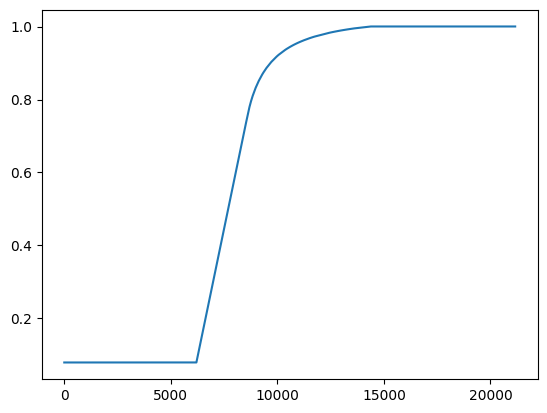

In [7]:
#load the first .mat file and print the data
import scipy.io as sio
import numpy as np

# Load the first .mat file
mat = sio.loadmat(mat_files[0])

# Plot the ['meas']['SOC'] data
import matplotlib.pyplot as plt

# Get the ['meas']['SOC'] data
soc = mat['meas']['SOC'][0][0]

# Plot the ['meas']['SOC'] data
plt.plot(soc)

plt.show()

In [8]:
# concatenate all the ['meas']['SOC'] data from all the .mat files into one array
# the data from each file should be appended to the array in the order that the files were found
# print the shape of the array

# Create an empty array
soc_array = np.array([])
# Loop through all the .mat files
for file in mat_files:
    # Load the .mat file
    mat = sio.loadmat(file)
    # Get the ['meas']['SOC'] data
    soc = mat['meas']['SOC'][0][0]
    # Append the ['meas']['SOC'] data to the array
    soc_array = np.append(soc_array, soc)

# Print the shape of the array
print(soc_array.shape)

(24413946,)


In [10]:
# concatenate all the ['meas']['Voltage'] and ['meas']['Current'] data from all the .mat files into one array
# the data from each file should be appended to the array in the order that the files were found
# print the shape of the array

# Create an empty array
v_array = np.array([])
i_array = np.array([])
# Loop through all the .mat files
for file in mat_files:
    # Load the .mat file
    mat = sio.loadmat(file)
    # Get the ['meas']['Voltage'] data
    v = mat['meas']['Voltage'][0][0]
    # Get the ['meas']['Current'] data
    i = mat['meas']['Current'][0][0]
    # Append the ['meas']['Voltage'] data to the array
    v_array = np.append(v_array, v)
    # Append the ['meas']['Current'] data to the array
    i_array = np.append(i_array, i)

# Print the shape of the array
print(v_array.shape)
print(i_array.shape)

(24413946,)
(24413946,)


In [11]:
# using the voltage and current arrays create arrays for:
# power, a moving current average of 500, a moving voltage average of 500, and a moving voltage average of 100

# Calculate the power
p_array = v_array * i_array

# Calculate the moving current average
i_avg_array = np.convolve(i_array, np.ones(500)/500, mode='same')

# Calculate the moving voltage average
v_5avg_array = np.convolve(v_array, np.ones(500)/500, mode='same')

# Calculate the moving voltage average
v_1avg_array = np.convolve(v_array, np.ones(100)/100, mode='same')




In [12]:
# Save everything to a datafram with keys corresponding to the variable names
import pandas as pd

# Create a dictionary with the data
data = {'SOC': soc_array, 'Voltage': v_array, 'Current': i_array, 'Power': p_array, 'Current Average': i_avg_array, 'Voltage 5 Average': v_5avg_array, 'Voltage 1 Average': v_1avg_array}

# Create a dataframe with the data
df = pd.DataFrame(data)

# Save the dataframe to a csv file
df.to_csv('training_data.csv')

In [4]:
# Download the helper library from https://www.twilio.com/docs/python/install
import os
from twilio.rest import Client

time = 12*60*60
rmse = 1.2

# Set environment variables for your credentials
# Read more at http://twil.io/secure
account_sid = "AC302209a332b7d9e3f441cdd0a5569ccf"
auth_token = "b467d59d57785221779f11f1400f3a37"
client = Client(account_sid, auth_token)
message = client.messages.create(
  body="Your model has finished training with a RMSE of " + str(rmse) + " in " + str(time/60/60) + " hours.",
  from_="+13613457812",
  to="+13653661086"
)
print(message.sid)

SM922b36cd3273d3ada7ead7a71a9c1d9b


In [6]:
#unzip "dataverse_files/4-Blind Model Submission Tool Examples.zip" into the current directory  

import zipfile

cwd = os.getcwd()

# Get the path to the zip file
zip_path = os.path.join(cwd, 'dataverse_files/4-Blind Model Submission Tool Examples.zip')

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(cwd)

In [16]:
# load the data from "4-Blind Model Submission Tool Examples/Example 3 - SOC Estimator Function Tester/Battery_Data.mat"
# extract the ['meas']['SOC'] data and save it to a variable
# extract the ['meas']['Voltage'] and ['meas']['Current'] data and save it to a variable
import scipy.io as sio
import matplotlib.pyplot as plt

# Load the .mat file
mat = sio.loadmat('4-Blind Model Submission Tool Examples/Example 3 - SOC Estimator Function Tester/Battery_Data.mat')

# Get the ['meas']['SOC'] data
soc = mat['meas']['SOC'][0][0]

# Get the ['meas']['Voltage'] data
v = mat['meas']['Voltage'][0][0]

# Get the ['meas']['Current'] data
i = mat['meas']['Current'][0][0]

#print all the shapes
print(soc.shape)
print(v.shape)
print(i.shape)

#ensure all the arrays are 1 dimensional
soc = soc.flatten()
v = v.flatten()
i = i.flatten()

#print all the shapes
print(soc.shape)
print(v.shape)
print(i.shape)

(88283, 1)
(88283, 1)
(88283, 1)
(88283,)
(88283,)
(88283,)


In [17]:
# using the voltage and current arrays create arrays for:
# power, a moving current average of 500, a moving voltage average of 500, and a moving voltage average of 100

import numpy as np

# Calculate the power
p_array = v * i

# Calculate the moving current average
i_avg_array = np.convolve(i, np.ones(500)/500, mode='same')

# Calculate the moving voltage average
v_5avg_array = np.convolve(v, np.ones(500)/500, mode='same')

# Calculate the moving voltage average
v_1avg_array = np.convolve(v, np.ones(100)/100, mode='same')

# Save everything to a datafram with keys corresponding to the variable names
import pandas as pd

# Create a dictionary with the data
data = {'SOC': soc, 'Voltage': v, 'Current': i, 'Power': p_array, 'Current Average': i_avg_array, 'Voltage 5 Average': v_5avg_array, 'Voltage 1 Average': v_1avg_array}

# Create a dataframe with the data
df = pd.DataFrame(data)

# Save the dataframe to a csv file
df.to_csv('blind_test_data.csv')



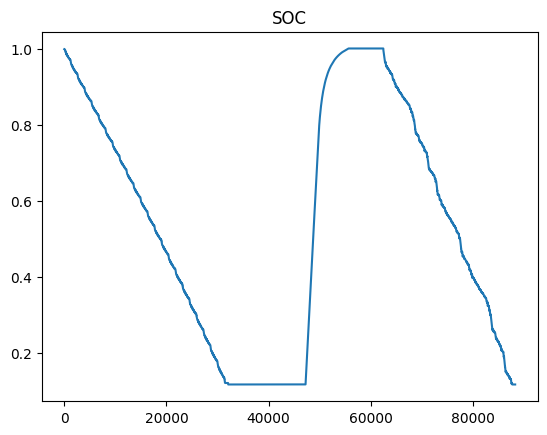

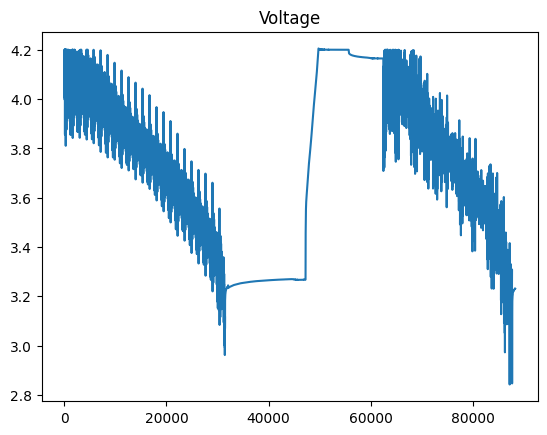

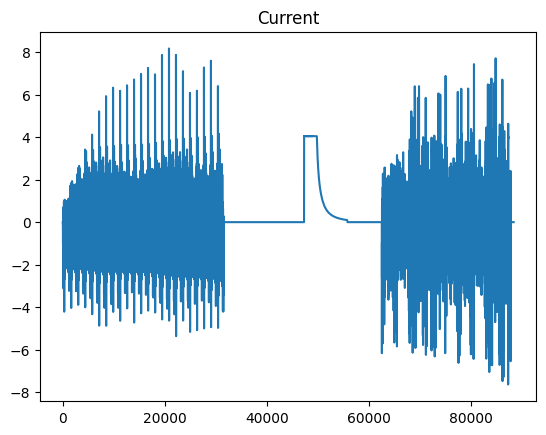

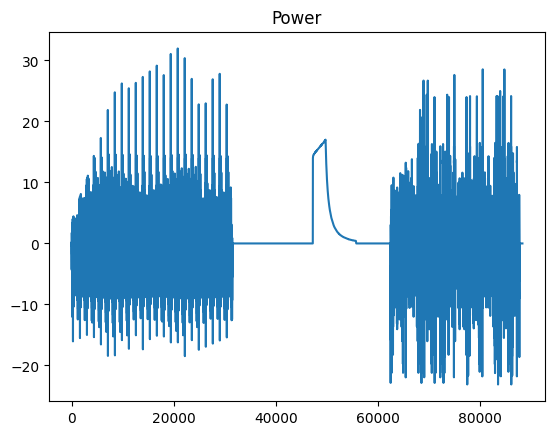

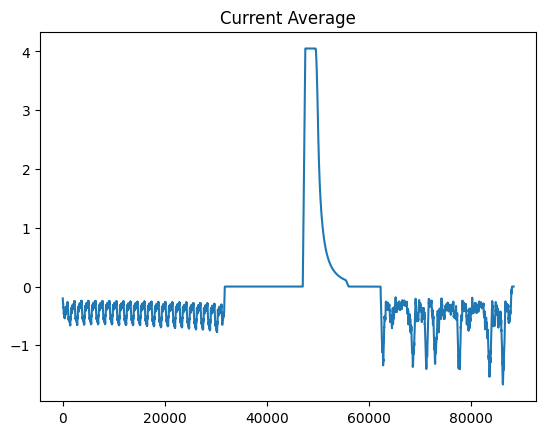

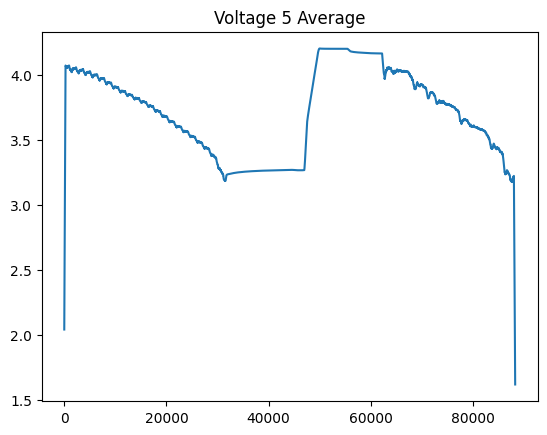

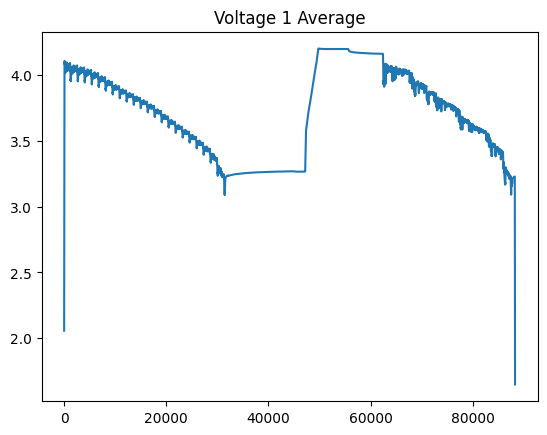

In [18]:
# open blind_test_data.csv and plot all the features into different plots
import pandas as pd
import matplotlib.pyplot as plt

# Read the csv file into a dataframe
df = pd.read_csv('blind_test_data.csv')

# Plot the data
plt.plot(df['SOC'])
plt.title('SOC')
plt.show()

plt.plot(df['Voltage'])
plt.title('Voltage')
plt.show()

plt.plot(df['Current'])
plt.title('Current')
plt.show()

plt.plot(df['Power'])
plt.title('Power')
plt.show()

plt.plot(df['Current Average'])
plt.title('Current Average')
plt.show()

plt.plot(df['Voltage 5 Average'])
plt.title('Voltage 5 Average')
plt.show()


plt.plot(df['Voltage 1 Average'])
plt.title('Voltage 1 Average')
plt.show()

